# CAT VS DOG CLASSIFICATION AND PREDICTION USING DEEP LEARNING (CNN)

# Importing Libraries

In [1]:
# Import neccessary library

import os
import imghdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


# To build neural network from the library "TensorFlow"
import tensorflow as tf
# Import keras from the package "tensorflow"
from tensorflow import keras

# To build the CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

from tensorflow.keras import layers, models
# To take images from the image directory
from tensorflow.keras.preprocessing import image_dataset_from_directory

# To viewing the classification report for the prediction
from sklearn.metrics import confusion_matrix

# To viewing the classification report for the prediction
from sklearn.metrics import classification_report

C:\Users\HP\AppData\Local\Temp\ipykernel_4640\2092449962.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# Loading Dataset

In [2]:
# To load the dataset where we have stored an images

data = "C:/Users/HP/OneDrive/Desktop/Cat vs Dog"
valid_image_extensions = ('.jpeg')
data

'C:/Users/HP/OneDrive/Desktop/Cat vs Dog'

In [3]:
valid_image_extensions

'.jpeg'

# To remove the non-images file 

In [4]:
# # To remove non-images file from the dataset

# # Iterate through each class directory
# for image_class in os.listdir(data):
#     class_path = os.path.join(data, image_class)
#     # Check if it's a directory
#     if os.path.isdir(class_path):
#         # Iterate through each image file
#         for image in os.listdir(class_path):
#             image_path = os.path.join(class_path, image)
#             try:
#                 # Read the image
#                 img = cv2.imread(image_path)
#                 # Check if the image was read correctly
#                 if img is None:
#                     print(f'Failed to read the image: {image_path}')
#                     os.remove(image_path)
#                 # Process the image if needed
#             except Exception as e:
#                 print(f'Error processing image {image_path}: {e}')

In [5]:
# # Create a function for remove non-images in a dataset

# def remove_non_images(directory):
#     for image_class in os.listdir(directory):
#         class_path = os.path.join(directory, image_class)
#         if os.path.isdir(class_path):
#             for file in os.listdir(class_path):
#                 file_path = os.path.join(class_path, file)
#                 if not os.path.isfile(file_path):
#                     print(f'Removing non-file: {file_path}')
#                     os.rmdir(file_path)  # Remove directories
#                 elif imghdr.what(file_path) not in ['jpg', 'png', 'gif', 'bmp']:
#                     print(f'Removing non-image file: {file_path}')
#                     os.remove(file_path)

# remove_non_images(data)

# Preprocessing Images

In [7]:
# Load and preprocess image data

datas = tf.keras.utils.image_dataset_from_directory(data)
datas

Found 80 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
# Get class names
class_names = datas.class_names
print(f'Class names: {class_names}')

Class names: ['Cat', 'Dog']


In [9]:
# Initialize class counts
class_counts = {class_name: 0 for class_name in class_names}

# Count the images in each class
for images, labels in datas:
    for label in labels.numpy():
        class_counts[class_names[label]] += 1

print(f'Image counts per class: {class_counts}')

Image counts per class: {'Cat': 40, 'Dog': 40}


# Splitting of data into Training and Testing 

In [10]:
# Here we trained the images 

train_data = tf.keras.utils.image_dataset_from_directory(
    data,
    validation_split=0.2,
    subset='training',
    seed = 42, #123
    image_size = (128, 128),
    batch_size = 32
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    data,
    validation_split=0.2,
    subset='validation',
    seed = 42, #123
    image_size = (128, 128),
    batch_size = 32
)

Found 80 files belonging to 2 classes.
Using 64 files for training.
Found 80 files belonging to 2 classes.
Using 16 files for validation.


# To visulize the dataset 

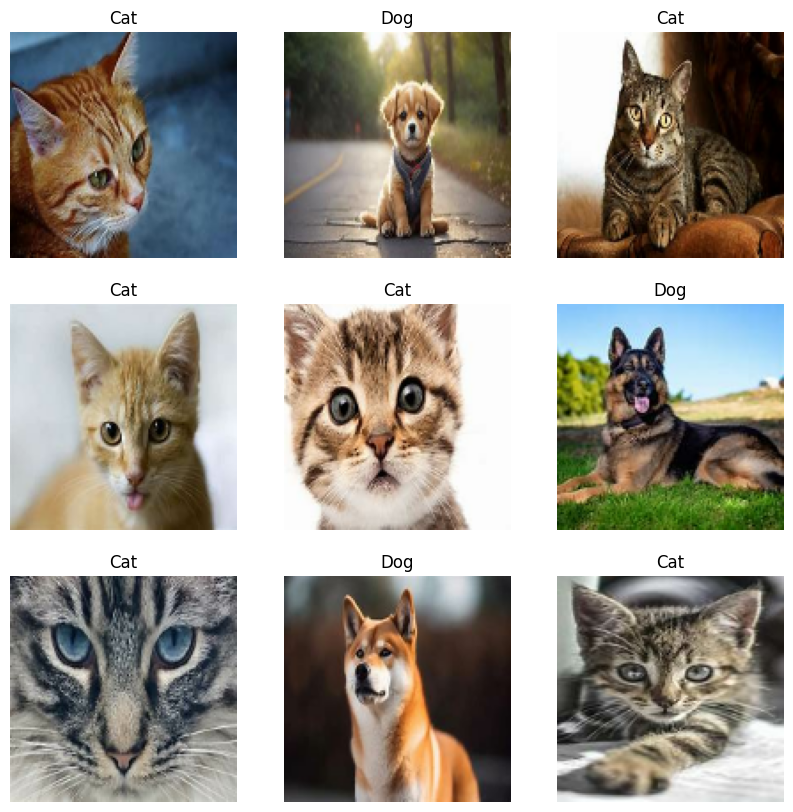

In [11]:
#1. To visualize 15 images from the dataset

class_names = train_data.class_names

plt.figure(figsize = (10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

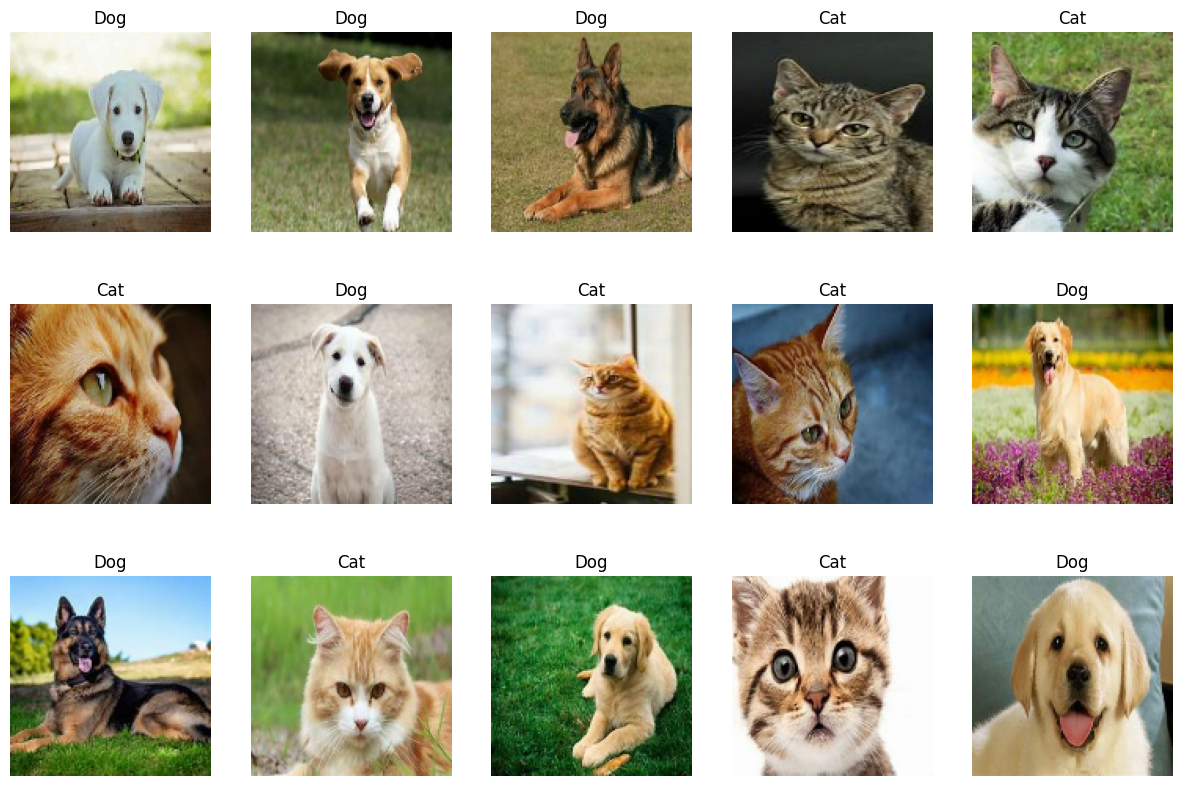

In [12]:
#2. To visualize 15 images from the dataset

class_names = train_data.class_names

plt.figure(figsize=(15, 10))  # Wider for more columns
for images, labels in train_data.take(1):
    for i in range(15):  # Show 15 images
        ax = plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

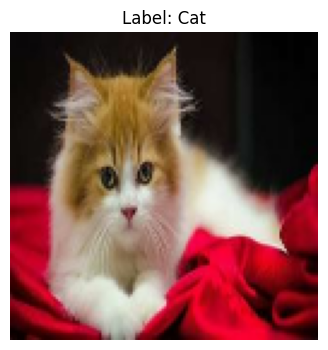

In [13]:
# 3. To visualize only 1 image from the dataset

class_names = train_data.class_names

# Take one batch from the dataset
for images, labels in train_data.take(1):
    img = images[0].numpy().astype("uint8")
    label = class_names[labels[0]]

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()
    break

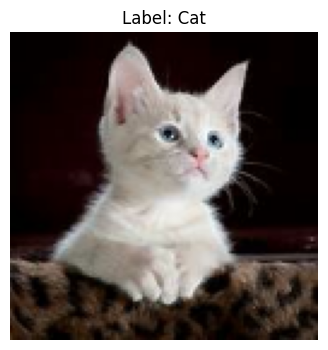

In [14]:
# 4. To view one dog image from the dataset

class_names = train_data.class_names

# Take one batch from the dataset
for images, labels in train_data.take(1):
    img = images[0].numpy().astype("uint8")
    label = class_names[labels[20]]

    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()
    break

# Build the CNN Model

In [16]:
# Define image size
img_size = (128, 128)

# Define data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomRotation(0.1),
])

# Normalize pixel values
normalization_layer = layers.Rescaling(1./255)

# Build the CNN model
model = models.Sequential([
    # layers.Input(shape=img_size + (3,)),
    layers.Input(shape = (128, 128, 3)),
    data_augmentation,
    normalization_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Show the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# To Fit the CNN Model

In [17]:
# To fit the CNN model or Training the CNN model

Model_Fit = model.fit(train_data, validation_data = validation_data, epochs = 15)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5104 - loss: 0.6933 - precision: 0.5090 - recall: 0.7292 - val_accuracy: 0.5000 - val_loss: 0.7973 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 418ms/step - accuracy: 0.5625 - loss: 0.6865 - precision: 0.5500 - recall: 0.9167 - val_accuracy: 0.5000 - val_loss: 0.7065 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5417 - loss: 0.7218 - precision: 0.6310 - recall: 0.3553 - val_accuracy: 0.5625 - val_loss: 0.6890 - val_precision: 0.5455 - val_recall: 0.7500
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.7708 - loss: 0.6313 - precision: 0.7286 - recall: 0.8500 - val_accuracy: 0.5000 - val_loss: 0.7518 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5625 - loss: 0.6584 - precision: 0.5357 - recall: 0.9583 - val_accuracy: 0.6250 - val_loss: 0.7066 - val_pr

# To view the Accuracy score of the model

In [18]:
model.evaluate(train_data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step - accuracy: 0.8125 - loss: 0.4683 - precision: 0.8141 - recall: 0.8125


[0.46749788522720337, 0.796875, 0.7878788113594055, 0.8125]

In [19]:
# To view the accuracy and other performance metrics.


score = model.evaluate(validation_data)
print("Loss:", score[0])
print("Accuracy:", score[1])
print("Precision:", score[2])
print("Recall:", score[3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.5000 - loss: 0.9232 - precision: 0.5000 - recall: 0.3750
Loss: 0.9232054352760315
Accuracy: 0.5
Precision: 0.5
Recall: 0.375


# To visualize the Model Evaluation

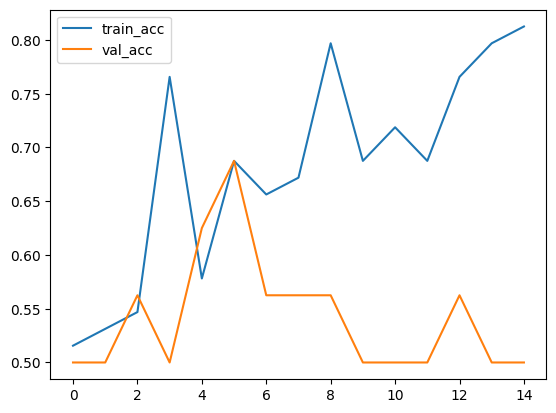

In [20]:

plt.plot(Model_Fit.history['accuracy'], label ='train_acc')
plt.plot(Model_Fit.history['val_accuracy'], label ='val_acc')
plt.legend()
plt.show()

# To view the confusion_matrix

In [22]:
# # To view the conusiion matrix

# print(confusion_matrix(y_true, y_pred))

# Get true labels
y_true = np.concatenate([y for x, y in validation_data], axis = 0)

# Get predictions
y_pred_probs = model.predict(validation_data)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()
y_pred_probs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


array([[0.8885877 ],
       [0.54126227],
       [0.36151996],
       [0.533988  ],
       [0.15077029],
       [0.21552649],
       [0.30363846],
       [0.24330014],
       [0.8487027 ],
       [0.23415387],
       [0.916613  ],
       [0.3300199 ],
       [0.28746703],
       [0.4819255 ],
       [0.77508545],
       [0.48481503]], dtype=float32)

In [23]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [24]:
# Create a variable "cm" for stored a matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[6, 2],
       [4, 4]], dtype=int64)

In [25]:
# # import seaborn 

# import seaborn as sns

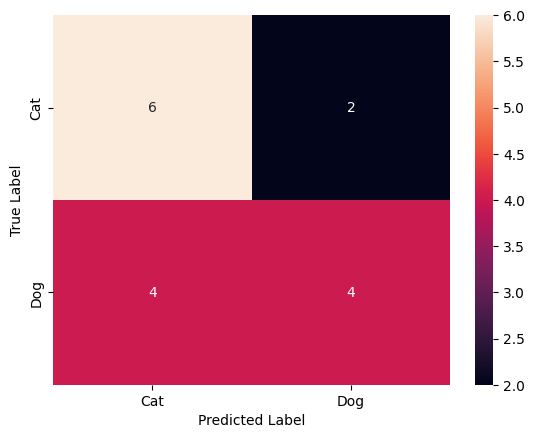

In [26]:
# To plot the heatmap for the above array

sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = ['Cat', 'Dog'], yticklabels = ['Cat', 'Dog'])
#sns.heatmap(cm, annot = True, fmt = 'd')
# plt.xlabel("Cat")
# plt.ylabel("Dog")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# To view the classification report

In [28]:
print(classification_report(y_true, y_pred, target_names = class_names)) # ['Cat', 'Dog']

              precision    recall  f1-score   support

         Cat       0.60      0.75      0.67         8
         Dog       0.67      0.50      0.57         8

    accuracy                           0.62        16
   macro avg       0.63      0.62      0.62        16
weighted avg       0.63      0.62      0.62        16



# To predict the individual images

# For Cat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


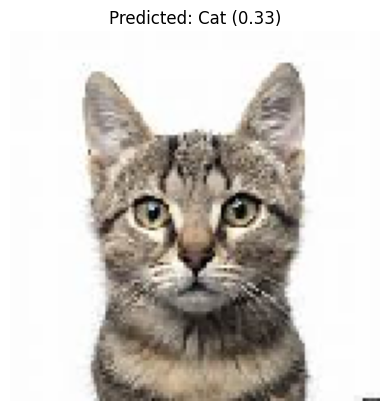

In [29]:

from tensorflow.keras.preprocessing import image

def predict_and_show(img_path):
    img = image.load_img(img_path, target_size = img_size)
    arr = image.img_to_array(img)/255.0
    pred = model.predict(np.expand_dims(arr, 0))[0][0]
    label = "Dog" if pred > 0.5 else "Cat"

    plt.imshow(img)
    plt.title(f"Predicted: {label} ({pred:.2f})")
    plt.axis('off')
    plt.show()
# To predict the cat using individual image
predict_and_show("C:/Users/HP/OneDrive/Desktop/Cat vs Dog/Cat/cat19.jpeg")

# For Dog

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


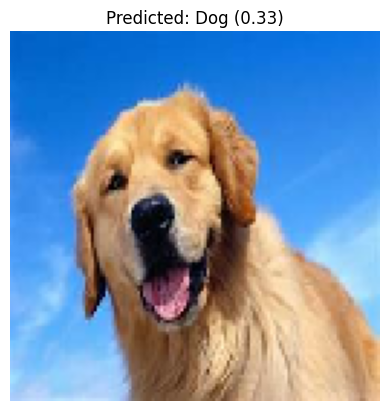

In [30]:


def predict_and_show(img_path):
    img = image.load_img(img_path, target_size = img_size)
    arr = image.img_to_array(img)/255.0
    pred = model.predict(np.expand_dims(arr, 0))[0][0]
    label = "Dog" if pred <= 0.5 else "Cat"

    plt.imshow(img)
    plt.title(f"Predicted: {label} ({pred:.2f})")
    #plt.title(f"Pred: {label} ({pred:.2f})\nTrue: {label if label else 'Unknown'}")
    plt.axis('off')
    plt.show()
# To predict the cat using individual image
predict_and_show("C:/Users/HP/OneDrive/Desktop/Cat vs Dog/Dog/dog14.jpeg")

# To predict the two images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_26184\4079067802.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = class_names[int(predictions[i] > 0.5)]


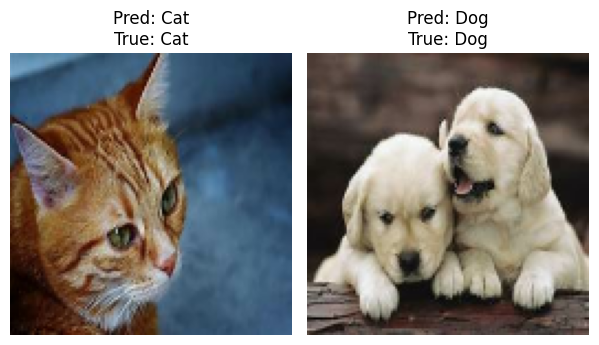

In [37]:
# Get class names (e.g., ['Cat', 'Dog'])
class_names = train_data.class_names

# Take the first batch from the dataset
for images, labels in train_data.take(1):
    predictions = model.predict(images[:10])  # Get predictions for first 10 images

    plt.figure(figsize = (15, 10))
    for i in range(2):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # predicted_label = class_names[int(predictions[i] > 0.5)]
        # actual_label = class_names[labels[i]]
        # confidence = predictions[i][0]
        # predicted_label = class_names[int(confidence > 0.5)]
        predicted_label = class_names[int(predictions[i] > 0.5)]
        # actual_label = class_names[labels[i]]
        actual_label = class_names[int(labels[i])]

        
        plt.title(f"Pred: {predicted_label}\nTrue: {actual_label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    break 